In [1]:
from pyfluids import Fluid, FluidsList, Input
from pyfluids.enums import Phases

import matplotlib.pyplot as plt

Fluid(FluidsList.CarbonDioxide) = Fluid(FluidsList.CarbonDioxide)


In [8]:
a = Fluid(FluidsList.CarbonDioxide).with_state(Input.enthalpy(200e3), Input.pressure(80e6))
b = Fluid(FluidsList.CarbonDioxide).with_state(Input.enthalpy(200e3), Input.pressure(6e6))
c = Fluid(FluidsList.CarbonDioxide).with_state(Input.enthalpy(400e3), Input.pressure(6e6))
d = Fluid(FluidsList.CarbonDioxide).with_state(Input.enthalpy(400e3), Input.pressure(80e6))

a_star = Fluid(FluidsList.CarbonDioxide).with_state(Input.enthalpy(200e3 + 1e-6), Input.pressure(80e6 + 1e-6))


Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    0       -5.209  80000000.000     1169.984   200000.000      737.972
    1        0.954  6000000.000      942.544   200000.000      990.172
    2       21.978  6000000.000      214.529   400000.000     1674.971
    3      117.406  80000000.000      896.138   400000.000     1353.603



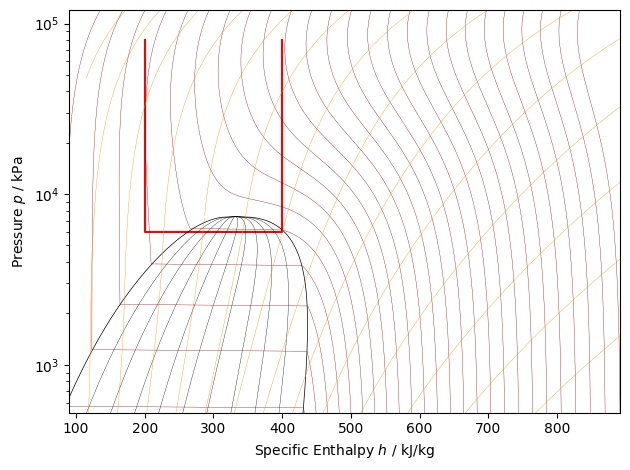

In [25]:
def cycle_ph(*state_list):
    import CoolProp
    from CoolProp.Plots import PropertyPlot
    from CoolProp.Plots.SimpleCycles import StateContainer
    from CoolProp.Plots.Common import BasePlot

    cycle_states = StateContainer()

    for ind, state in enumerate(state_list):
        cycle_states[ind,'H'] = state.enthalpy
        cycle_states[ind,'S'] = state.entropy
        cycle_states[ind,'D'] = state.density
        cycle_states[ind,CoolProp.iP] = state.pressure
        cycle_states[ind,CoolProp.iT] = state.temperature


    print(cycle_states)

    pp = PropertyPlot('CO2', 'PH')
    
    old_limits = pp.get_axis_limits()
    pp.set_axis_limits([
        old_limits[0],
        max(old_limits[1], 1.5 * max([state.enthalpy for state in state_list]) / 1e3),
        old_limits[2],
        max(old_limits[3], 1.5 * max([state.pressure for state in state_list]) / 1e3),
    ])
    
    pp.draw_process(cycle_states)

    pp.calc_isolines(CoolProp.iQ, num=11)
    pp.calc_isolines(CoolProp.iT, num=25)
    pp.calc_isolines(CoolProp.iSmass, num=15)
    
    pp.show()

import warnings
warnings.filterwarnings("ignore")
cycle_ph(a, b, c, d)